In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

In [2]:
alpha, beta, k = args = var("alpha, beta, k")
t = var("t")
z = var("z")
y_0 = var("y_0")

curve_expr = alpha * exp(-beta * exp(-k**t))
display(curve_expr)

true_curve_expr = curve_expr.subs([(alpha, 1.0), (beta, 1.25), (k, 1.07)])
display(true_curve_expr)


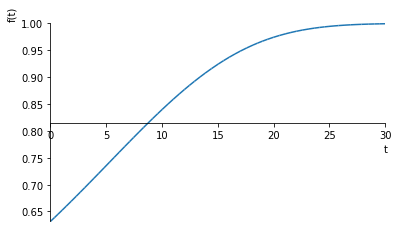

[(0, 0.63137878619651466), (5, 0.73531180420679765), (10, 0.8396095163837477), (15, 0.92386311067211879)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 5)]
print(sample_data)

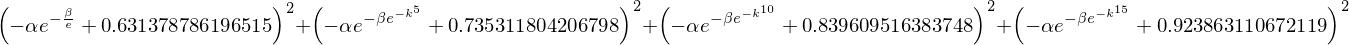

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

# seed_num = 431
# np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [5]:
points_histories = []
local_minima = np.inf
for i in range(50):
    points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run(50)
    points_histories.append(points_history)
    local_minima = min(local_minima, _local_minima)
points_histories = np.array(points_histories)
print local_minima

/Users/takada/.pyenv/versions/2.7.13/envs/krawczyk-dev/lib/python2.7/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in exp
  """


7.27861032397e-07


In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [7]:
X = ip([
    [interval[0.998, 1.021]],
    [interval[1.2499, 1.2552]], 
    [interval[1.0697, 1.07013]]
])

X = ip([
    [interval[0.8, 1.25]],
    [interval[0.5, 1.3]], 
    [interval[0.6, 1.25]]
])

f(X)

In [8]:
kra = Krawczyk(df, ddf, X)

In [13]:
import time
local_minima = np.inf
st = time.time()
%time ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(\
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=100000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:15436, len(S):0, len(T):6, len(U):0

15436
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([0.9999999999999775, 1.000000000000022])],
  [interval([1.2499999999999427, 1.2500000000000524])],
  [interval([1.0699999999999947, 1.0700000000000058])]],
 [[interval([0.9999999999999735, 1.000000000000025])],
  [interval([1.2499999999999332, 1.2500000000000602])],
  [interval([1.0699999999999938, 1.0700000000000067])]],
 [[interval([0.9999999999999775, 1.000000000000022])],
  [interval([1.2499999999999427, 1.2500000000000524])],
  [interval([1.0699999999999947, 1.0700000000000058])]],
 [[interval([0.9999999999999738, 1.0000000000000253])],
  [interval([1.2499999999999338, 1.2500000000000608])],
  [interval([1.0699999999999938, 1.0700000000000067])]],
 [[interval([0.9999999999999776, 1.000000000000022])],
  [interval([1.2499999999999432, 1.2500000000000526])],
  [interval([1.0699999999999947, 1.0700000000000056

In [10]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)